**Lets build the last model MobileNetV2**

In [ ]:
IMAGE_SIZE = (224, 224)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, IMAGE_SIZE), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, IMAGE_SIZE), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, IMAGE_SIZE), y))


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze pretrained layers

model_mobile = models.Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # Replace 10 with your number of classes
])

model_mobile.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_mobile = model_mobile.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.7982 - loss: 0.5938 - val_accuracy: 0.8979 - val_loss: 0.2878
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8962 - loss: 0.2957 - val_accuracy: 0.9093 - val_loss: 0.2530
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.9138 - loss: 0.2444 - val_accuracy: 0.9152 - val_loss: 0.2477
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9211 - loss: 0.2180 - val_accuracy: 0.9104 - val_loss: 0.2681
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.9252 - loss: 0.2104 - val_accuracy: 0.9119 - val_loss: 0.2401
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.9324 - loss: 0.1845 - val_accuracy: 0.9226 - val_loss: 0.2339
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.9350 - loss: 0.1749 - val_accuracy: 0.9174 - val_loss: 0.2463
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.9412 - loss: 0.1611 - 

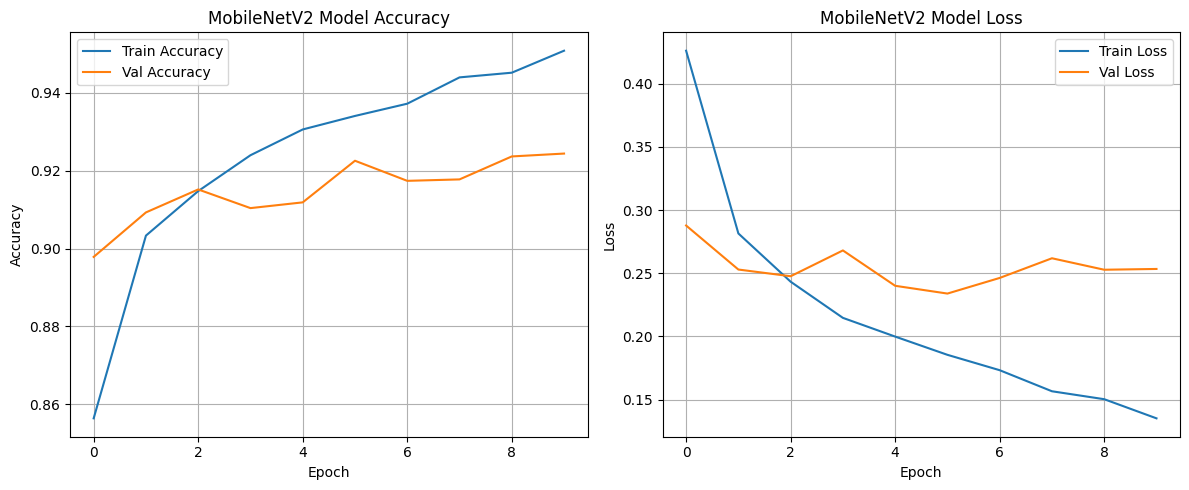

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Val Accuracy')
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_mobile.history['loss'], label='Train Loss')
plt.plot(history_mobile.history['val_loss'], label='Val Loss')
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1

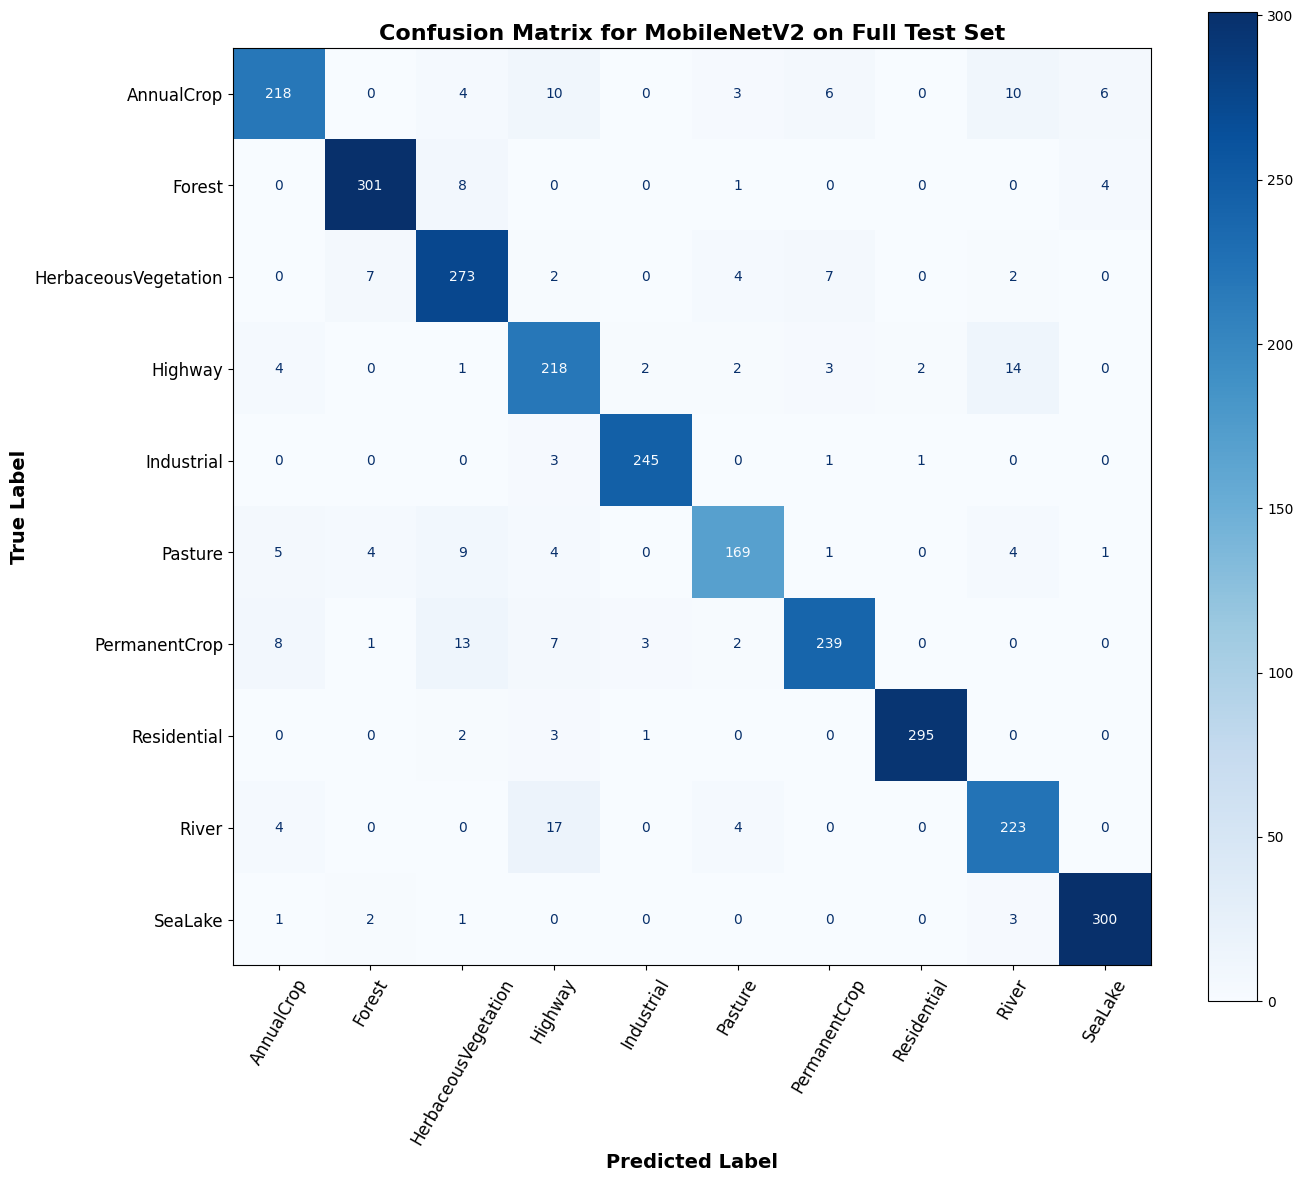

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_trues = []
all_preds = []

# Collect true labels and predictions for entire test set
for images, labels in test_ds:
    preds = model_mobile.predict(images)
    predicted_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)

    all_preds.extend(predicted_classes)
    all_trues.extend(true_classes)

# Compute confusion matrix
cm = confusion_matrix(all_trues, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 12))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=60, values_format='d')

ax.set_title("Confusion Matrix for MobileNetV2 on Full Test Set", fontsize=16, weight='bold')
ax.set_xlabel("Predicted Label", fontsize=14, weight='bold')
ax.set_ylabel("True Label", fontsize=14, weight='bold')

plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


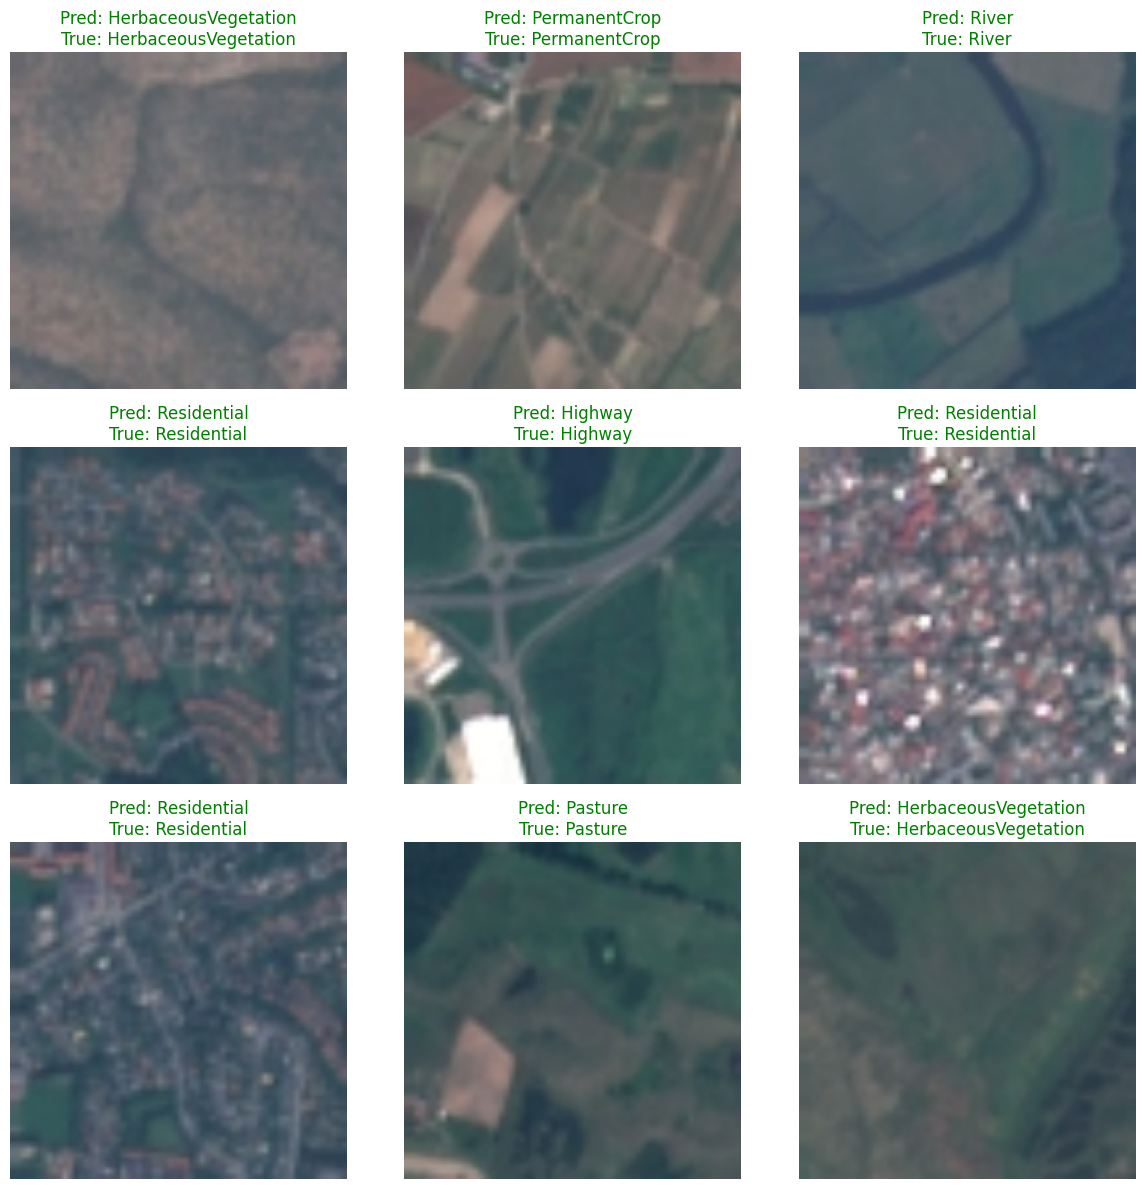

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Take one batch of images and labels from test_ds
for images, labels in test_ds.take(1):
    predictions = model_mobile.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)

    plt.figure(figsize=(12, 12))

    # Display first 9 images from the batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(tf.cast(images[i], tf.uint8))
        pred_label = class_names[predicted_classes[i]]
        true_label = class_names[true_classes[i]]
        color = "green" if pred_label == true_label else "red"
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

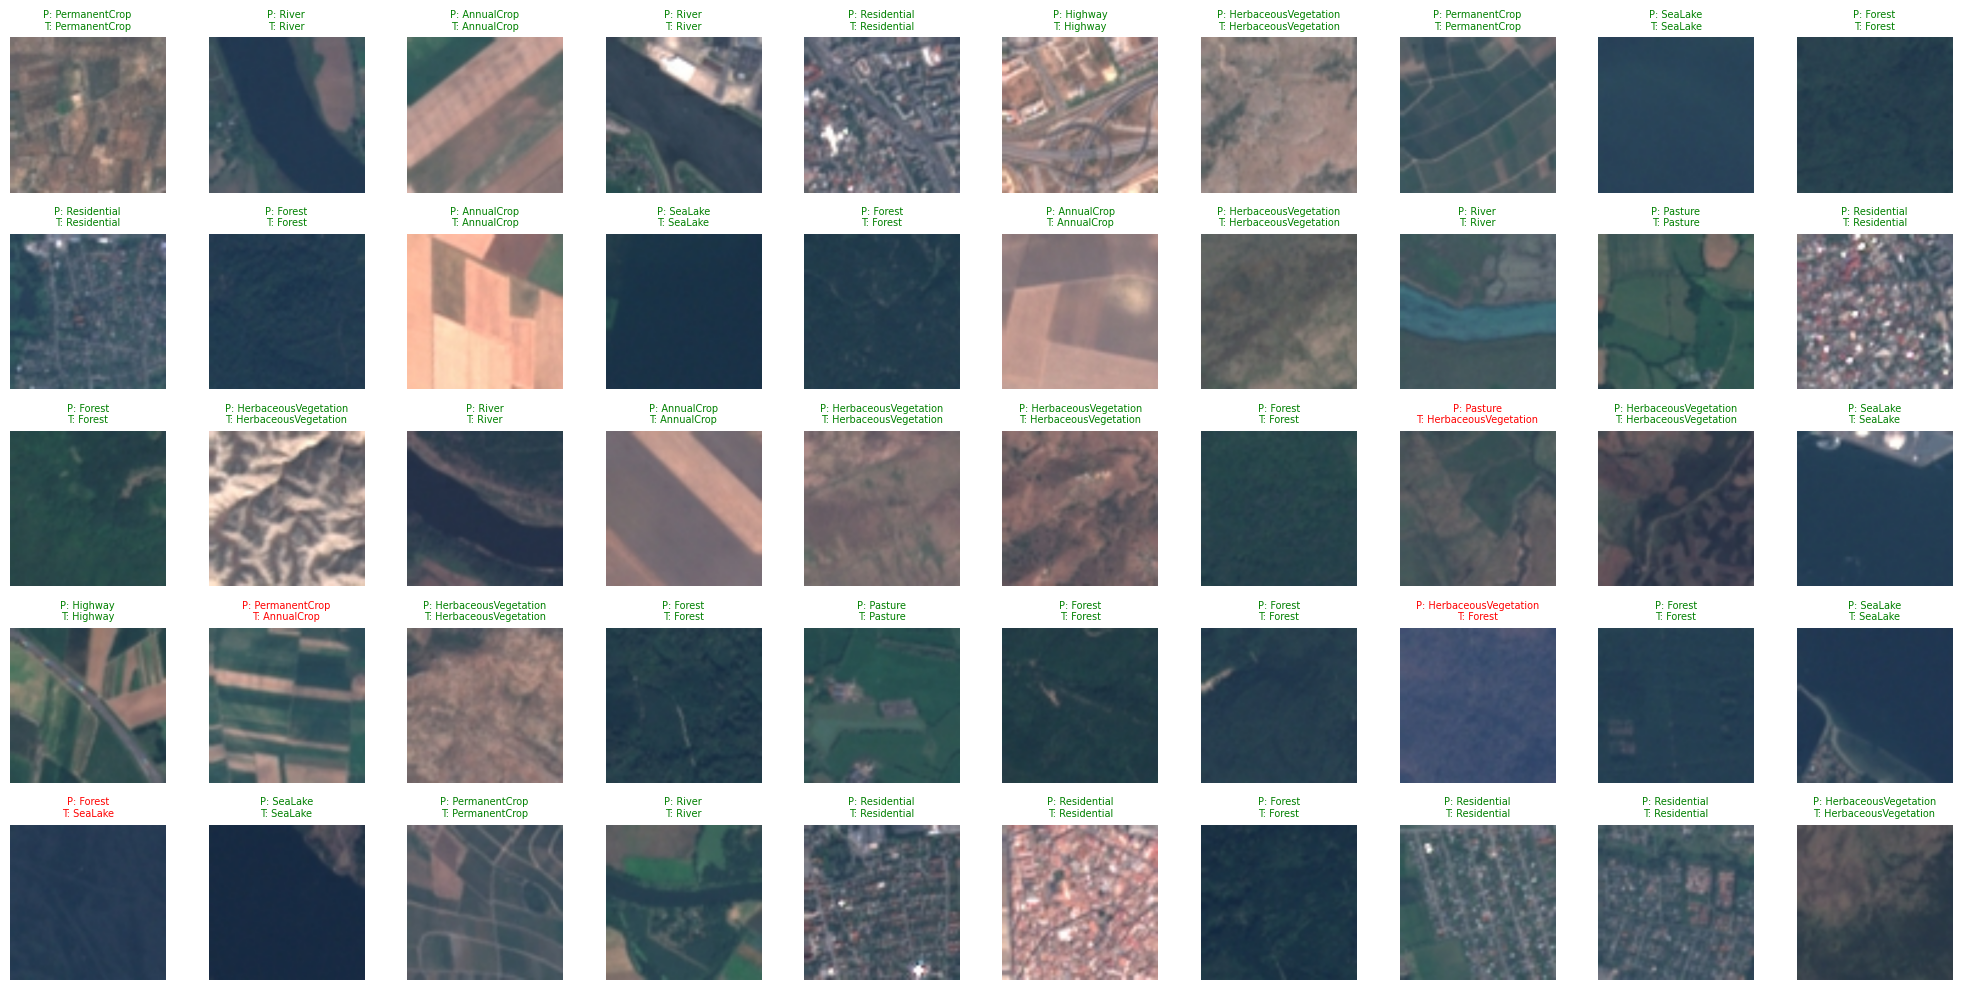

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Lists to store images and labels
all_images = []
all_preds = []
all_trues = []

# Take 50 individual images from the unbatched test dataset
for image, label in test_ds.unbatch().take(50):
    img_array = tf.expand_dims(image, axis=0)  # Add batch dimension for prediction
    prediction = model_mobile.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    true_class = np.argmax(label.numpy())

    all_images.append(image.numpy().astype("uint8"))
    all_preds.append(predicted_class)
    all_trues.append(true_class)

# Plot 50 images in a 10x5 grid
plt.figure(figsize=(20, 10))
for i in range(50):
    ax = plt.subplot(5, 10, i + 1)
    plt.imshow(all_images[i])
    pred_label = class_names[all_preds[i]]
    true_label = class_names[all_trues[i]]
    color = "green" if pred_label == true_label else "red"
    plt.title(f"P: {pred_label}\nT: {true_label}", fontsize=7, color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:


# Generate classification report
report = classification_report(all_trues, all_preds, target_names=class_names)
print("Classification Report for MobileNetV2 on Full Test Set:\n")
print(report)


Classification Report for MobileNetV2 on Full Test Set:

                      precision    recall  f1-score   support

          AnnualCrop       0.92      0.85      0.88       105
              Forest       0.94      0.98      0.96       108
HerbaceousVegetation       0.90      0.90      0.90       102
             Highway       0.79      0.85      0.82        88
          Industrial       0.98      0.99      0.98        83
             Pasture       0.93      0.84      0.88        77
       PermanentCrop       0.91      0.85      0.88        86
         Residential       0.99      0.99      0.99       112
               River       0.86      0.91      0.89        89
             SeaLake       0.96      0.99      0.98       110

            accuracy                           0.92       960
           macro avg       0.92      0.92      0.92       960
        weighted avg       0.92      0.92      0.92       960

